# Display the data types of each column using the attribute dtypes, then take a screenshot and submit it. Include your code in the image.

In [1]:
import pandas as pd

# URL dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

# Load dataset directly from the URL
df = pd.read_csv(url)

# Display the data types of each column
print(df.dtypes)


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot and submit it.

In [2]:
# Drop the columns 'id' and 'Unnamed: 0'
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Display statistical summary
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

# Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame. Take a screenshot of your code and output and submit it.

In [3]:
# Count unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()

print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


# Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot and submit it.

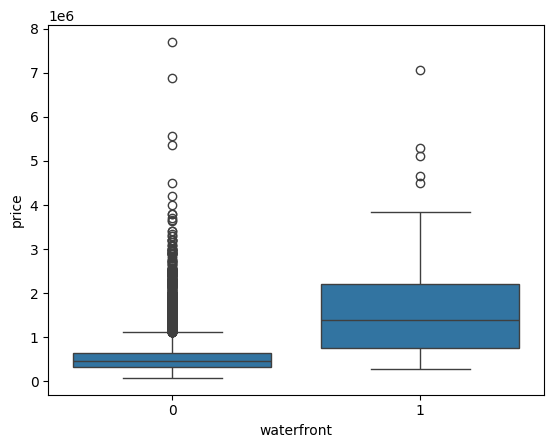

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price vs waterfront
sns.boxplot(x="waterfront", y="price", data=df)

# Show the plot
plt.show()


# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it. Submit your screenshot.

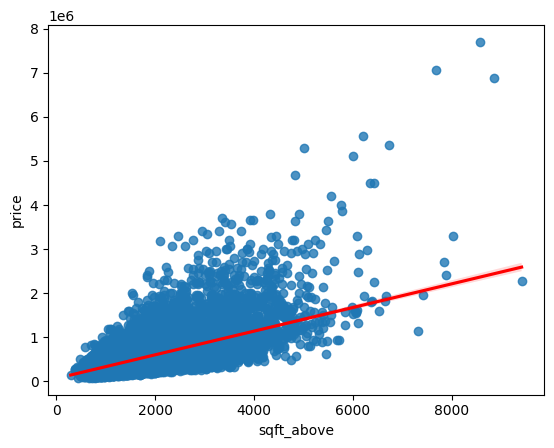

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for sqft_above vs price
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"red"})

plt.show()


# Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2. Take a screenshot of your code and the value of the R^2. Submit the screenshot.

In [6]:
from sklearn.linear_model import LinearRegression

# Define the feature (X) and target (Y)
X = df[['sqft_living']]   # phải để trong [[]] để giữ dạng DataFrame
Y = df['price']

# Create linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate R^2
R2 = lm.score(X, Y)
print("R^2:", R2)


R^2: 0.4928532179037931


# Fit a linear regression model to predict the 'price' using the list of features:

"floors"
"waterfront"
"lat"
"bedrooms"
"sqft_basement"
"view"
"bathrooms"
"sqft_living15"
"sqft_above"
"grade"
"sqft_living"

Take a screenshot of your code and R^2 value and upload it.

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url)

for col in ["id", "Unnamed: 0"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", LinearRegression())
])

pipe.fit(X, y)
R2 = pipe.score(X, y)
print("R^2:", R2)


R^2: 0.65769516660375


# Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2 and upload it.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression()),
])

pipe.fit(X, y)
print("R^2:", pipe.score(X, y))


R^2: 0.7513408515988734


# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the R^2 and upload it.

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Chọn features và target (giống yêu cầu trước)
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

# Xử lý NaN (điền giá trị mean)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Tách train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Tạo Ridge Regression với alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit trên training data
ridge_model.fit(X_train, y_train)

# Tính R^2 trên test data
R2_test = ridge_model.score(X_test, y_test)
print("R^2 on test data:", R2_test)


R^2 on test data: 0.64591522548915


# Perform a second-order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided. Take a screenshot of your code and the R^2 and upload it.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# 1) Chọn features và target
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

# 2) Tách train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# 3) Xử lý thiếu dữ liệu (fit trên train, transform cả train & test)
imputer = SimpleImputer(strategy="mean")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# 4) Biến đổi đa thức bậc 2 (fit trên train, transform cả train & test)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imp)
X_test_poly  = poly.transform(X_test_imp)

# 5) Ridge Regression với alpha=0.1 (fit trên train)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# 6) Tính R^2 trên test
R2_test = ridge.score(X_test_poly, y_test)
print("R^2 on test data (degree=2 + Ridge alpha=0.1):", R2_test)


R^2 on test data (degree=2 + Ridge alpha=0.1): 0.7543637980817197
